In [1]:
import time
import numpy as np
from matplotlib import pyplot as plt
from keras.utils import np_utils
import keras.callbacks as cb
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import RMSprop
from keras.datasets import mnist

/opt/conda/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


## Training methods

In [2]:
def load_and_prepare_data():
    print('Loading data...')
    
    # Keras provides MNIST dataset as two tuples for training and testing sets.
    # https://keras.io/datasets/#mnist-database-of-handwritten-digits
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    
    print('Done.')
    print('Preparing data...')

    # The input datasets should have values between 0-1 instead of having a range of 0-255.
    # This requires typecasting them from int to float at first.
    X_train = X_train.astype('float32')
    X_test = X_test.astype('float32')
    X_train /= 255
    X_test /= 255

    # The output datasets should be converted from simply having a value between 0-9 to having
    # a matrix of categorical one-hot encoding. Example:
    # 2 -> [0 0 1 0 0 0 0 0 0 0]
    # 9 -> [0 0 1 0 0 0 0 0 0 9]
    y_train = np_utils.to_categorical(y_train, 10)
    y_test = np_utils.to_categorical(y_test, 10)

    # The MINST input is 28x28 grayscale images. Let's convert them to single row vectors.
    X_train = np.reshape(X_train, (60000, 784))
    X_test = np.reshape(X_test, (10000, 784))

    print('Done.')
    return [X_train, X_test, y_train, y_test]

In [3]:
def compile_model():
    print('Compiling model...')
    
    start_time = time.time()
    
    model = Sequential()
    model.add(Dense(500, input_dim=784))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(300))
    model.add(Activation('relu'))
    model.add(Dropout(0.4))
    model.add(Dense(10))
    model.add(Activation('softmax'))

    rms = RMSprop()
    model.compile(loss='categorical_crossentropy', optimizer=rms, metrics=['accuracy'])

    print('Model compiled in {0} seconds.'.format(time.time() - start_time))
    return model

In [4]:
class loss_history_callback(cb.Callback):
    def on_train_begin(self, logs={}):
        self.losses = []

    def on_batch_end(self, batch, logs={}):
        batch_loss = logs.get('loss')
        self.losses.append(batch_loss)

In [5]:
def train_model(model=None, data=None, epochs=20, batch=256):
    try:
        start_time = time.time()

        X_train, X_test, y_train, y_test = data

        print('Training model...')

        loss_history = loss_history_callback()
        model.fit(X_train, y_train, epochs=epochs, batch_size=batch,
                  callbacks=[loss_history],
                  validation_data=(X_test, y_test), verbose=2)

        print("Training duration : {0} seconds.".format(time.time() - start_time))

        score = model.evaluate(X_test, y_test, batch_size=16)

        print("Model's test score [loss, accuracy]: {0}".format(score))

        return model, loss_history.losses
    except KeyboardInterrupt:
        # This way we can interrupt the model training at any time without losing data collected so far.
        print('>>> KeyboardInterrupt')
        return model, loss_history.losses

In [6]:
# Use the losses collected through the history callback method to plot results.
def plot_losses(losses):
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.plot(losses)
    ax.set_title('Loss per batch')

## Training the model with different hyperparameters

In [7]:
data = load_and_prepare_data()

Loading data...
11493376/11490434 [==============================] - 3s 0us/step
Done.
Preparing data...
Done.


### Trial 1

Compiling model...
Model compield in 0.14888596534729004 seconds.
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 7s - loss: 0.3536 - acc: 0.8914 - val_loss: 0.1571 - val_acc: 0.9510
Epoch 2/20
 - 6s - loss: 0.1558 - acc: 0.9532 - val_loss: 0.1012 - val_acc: 0.9669
Epoch 3/20
 - 6s - loss: 0.1151 - acc: 0.9652 - val_loss: 0.0877 - val_acc: 0.9720
Epoch 4/20
 - 6s - loss: 0.0953 - acc: 0.9710 - val_loss: 0.0814 - val_acc: 0.9758
Epoch 5/20
 - 6s - loss: 0.0810 - acc: 0.9755 - val_loss: 0.0733 - val_acc: 0.9789
Epoch 6/20
 - 6s - loss: 0.0716 - acc: 0.9780 - val_loss: 0.0789 - val_acc: 0.9781
Epoch 7/20
 - 6s - loss: 0.0644 - acc: 0.9808 - val_loss: 0.0652 - val_acc: 0.9831
Epoch 8/20
 - 6s - loss: 0.0575 - acc: 0.9823 - val_loss: 0.0658 - val_acc: 0.9828
Epoch 9/20
 - 6s - loss: 0.0540 - acc: 0.9830 - val_loss: 0.0677 - val_acc: 0.9824
Epoch 10/20
 - 9s - loss: 0.0490 - acc: 0.9847 - val_loss: 0.0709 - val_acc: 0.9824
Epoch 11/20
 - 7s - loss: 0.0465 - 

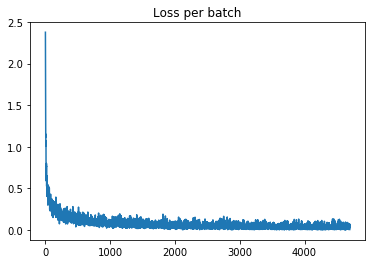

In [8]:
# 20 epochs and 256 batches
model = compile_model()
model, losses = train_model(model=model, data=data)
plot_losses(losses)

### Trial 2

Compiling model...
Model compield in 0.15125203132629395 seconds.
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 7s - loss: 0.3543 - acc: 0.8920 - val_loss: 0.1408 - val_acc: 0.9572
Epoch 2/30
 - 6s - loss: 0.1526 - acc: 0.9537 - val_loss: 0.1069 - val_acc: 0.9676
Epoch 3/30
 - 6s - loss: 0.1136 - acc: 0.9659 - val_loss: 0.0820 - val_acc: 0.9751
Epoch 4/30
 - 8s - loss: 0.0898 - acc: 0.9727 - val_loss: 0.0738 - val_acc: 0.9769
Epoch 5/30
 - 9s - loss: 0.0771 - acc: 0.9769 - val_loss: 0.0704 - val_acc: 0.9786
Epoch 6/30
 - 9s - loss: 0.0707 - acc: 0.9786 - val_loss: 0.0709 - val_acc: 0.9805
Epoch 7/30
 - 8s - loss: 0.0625 - acc: 0.9815 - val_loss: 0.0759 - val_acc: 0.9793
Epoch 8/30
 - 8s - loss: 0.0571 - acc: 0.9821 - val_loss: 0.0667 - val_acc: 0.9823
Epoch 9/30
 - 8s - loss: 0.0525 - acc: 0.9842 - val_loss: 0.0692 - val_acc: 0.9825
Epoch 10/30
 - 8s - loss: 0.0495 - acc: 0.9853 - val_loss: 0.0713 - val_acc: 0.9822
Epoch 11/30
 - 8s - loss: 0.0459 - 

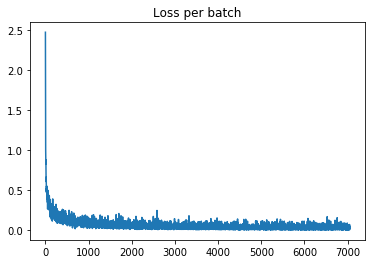

In [9]:
# 30 epochs and 256 batches
model = compile_model()
model, losses = train_model(model=model, data=data, epochs=30)
plot_losses(losses)

### Trial 3

Compiling model...
Model compield in 0.2608358860015869 seconds.
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 8s - loss: 0.4407 - acc: 0.8640 - val_loss: 0.1886 - val_acc: 0.9417
Epoch 2/30
 - 7s - loss: 0.1844 - acc: 0.9445 - val_loss: 0.1187 - val_acc: 0.9637
Epoch 3/30
 - 9s - loss: 0.1326 - acc: 0.9599 - val_loss: 0.1216 - val_acc: 0.9619
Epoch 4/30
 - 9s - loss: 0.1047 - acc: 0.9683 - val_loss: 0.0804 - val_acc: 0.9749
Epoch 5/30
 - 8s - loss: 0.0895 - acc: 0.9721 - val_loss: 0.0740 - val_acc: 0.9769
Epoch 6/30
 - 9s - loss: 0.0764 - acc: 0.9761 - val_loss: 0.0696 - val_acc: 0.9799
Epoch 7/30
 - 8s - loss: 0.0663 - acc: 0.9793 - val_loss: 0.0705 - val_acc: 0.9793
Epoch 8/30
 - 8s - loss: 0.0606 - acc: 0.9815 - val_loss: 0.0660 - val_acc: 0.9809
Epoch 9/30
 - 8s - loss: 0.0548 - acc: 0.9826 - val_loss: 0.0654 - val_acc: 0.9818
Epoch 10/30
 - 8s - loss: 0.0488 - acc: 0.9847 - val_loss: 0.0705 - val_acc: 0.9816
Epoch 11/30
 - 8s - loss: 0.0467 - a

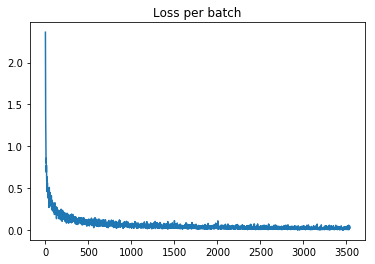

In [10]:
model = compile_model()
model, losses = train_model(model=model, data=data, epochs=30, batch=512)
plot_losses(losses)

### Trial 4

Compiling model...
Model compield in 0.17516684532165527 seconds.
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/30
 - 10s - loss: 0.3123 - acc: 0.9044 - val_loss: 0.1176 - val_acc: 0.9625
Epoch 2/30
 - 9s - loss: 0.1405 - acc: 0.9571 - val_loss: 0.0857 - val_acc: 0.9727
Epoch 3/30
 - 9s - loss: 0.1103 - acc: 0.9680 - val_loss: 0.0889 - val_acc: 0.9737
Epoch 4/30
 - 9s - loss: 0.0938 - acc: 0.9722 - val_loss: 0.0735 - val_acc: 0.9796
Epoch 5/30
 - 9s - loss: 0.0873 - acc: 0.9753 - val_loss: 0.0739 - val_acc: 0.9814
Epoch 6/30
 - 10s - loss: 0.0802 - acc: 0.9778 - val_loss: 0.0849 - val_acc: 0.9800
Epoch 7/30
 - 9s - loss: 0.0738 - acc: 0.9794 - val_loss: 0.0827 - val_acc: 0.9814
Epoch 8/30
 - 9s - loss: 0.0682 - acc: 0.9809 - val_loss: 0.0823 - val_acc: 0.9808
Epoch 9/30
 - 9s - loss: 0.0648 - acc: 0.9821 - val_loss: 0.0828 - val_acc: 0.9812
Epoch 10/30
 - 9s - loss: 0.0620 - acc: 0.9832 - val_loss: 0.0822 - val_acc: 0.9820
Epoch 11/30
 - 11s - loss: 0.0589

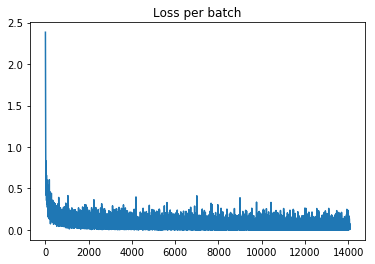

In [11]:
model = compile_model()
model, losses = train_model(model= model, data=data, epochs=30, batch=128)
plot_losses(losses)

### Trial 5

Compiling model...
Model compield in 0.15524792671203613 seconds.
Training model...
Train on 60000 samples, validate on 10000 samples
Epoch 1/20
 - 9s - loss: 0.3082 - acc: 0.9067 - val_loss: 0.1159 - val_acc: 0.9625
Epoch 2/20
 - 9s - loss: 0.1438 - acc: 0.9572 - val_loss: 0.0996 - val_acc: 0.9711
Epoch 3/20
 - 9s - loss: 0.1106 - acc: 0.9677 - val_loss: 0.0831 - val_acc: 0.9765
Epoch 4/20
 - 9s - loss: 0.0975 - acc: 0.9724 - val_loss: 0.0844 - val_acc: 0.9767
Epoch 5/20
 - 9s - loss: 0.0841 - acc: 0.9756 - val_loss: 0.0792 - val_acc: 0.9787
Epoch 6/20
 - 10s - loss: 0.0772 - acc: 0.9781 - val_loss: 0.0759 - val_acc: 0.9806
Epoch 7/20
 - 10s - loss: 0.0709 - acc: 0.9799 - val_loss: 0.0824 - val_acc: 0.9788
Epoch 8/20
 - 8s - loss: 0.0671 - acc: 0.9803 - val_loss: 0.0733 - val_acc: 0.9825
Epoch 9/20
 - 9s - loss: 0.0627 - acc: 0.9825 - val_loss: 0.0810 - val_acc: 0.9817
Epoch 10/20
 - 10s - loss: 0.0626 - acc: 0.9836 - val_loss: 0.0780 - val_acc: 0.9824
Epoch 11/20
 - 10s - loss: 0.057

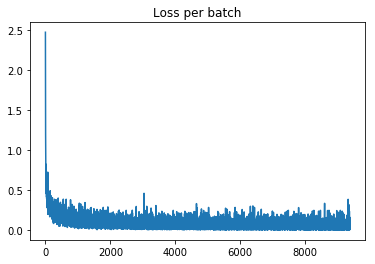

In [12]:
model = compile_model()
model, losses = train_model(model= model, data=data, epochs=20, batch=128)
plot_losses(losses)